<a href="https://colab.research.google.com/github/vyshnavinellore/2216129_AIML_BootCamp/blob/main/SMSSpamCollection21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/sample_data/SMSSpamCollection.csv", sep="\t", header=None, names=["Label", "Message"])

In [6]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#data preprocessing
#method2
df['Label']=df.Label.map({'ham':0,'spam':1})

In [8]:
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


DEMO OF BOW WITH HELP OF COUNTVECTORIZER

In [9]:
#Define the documents
dff=['hello, Hi How Are You','Win money , win from home','Call me now']

from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [10]:
#fit_tranform,transform
count_vector.fit(df)
CountVectorizer()

CountVectorizer()

In [11]:
n=count_vector.get_feature_names()
print(n)

['label', 'message']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
doc_array=count_vector.transform(dff).toarray()

In [13]:
doc_array

array([[0, 0],
       [0, 0],
       [0, 0]])

In [14]:
freq_table=pd.DataFrame(data=doc_array,columns=n)

In [15]:
freq_table

,label,message
0,0,0
1,0,0
2,0,0


In [16]:
#loading the data
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
x=df.iloc[:,-1:].values#independent-message
y=df.iloc[:,:-1].values#dependent-label

#method 2
import numpy as np
x1=np.array(df[['Message']])
y1=np.array(df[['Label']])

In [18]:
x1

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [19]:
x

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [20]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [21]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [22]:
x_train

array([["Hi , where are you? We're at  and they're not keen to go out i kind of am but feel i shouldn't so can we go out tomo, don't mind do you?"],
       ['If you r @ home then come down within 5 min'],
       ["When're you guys getting back? G said you were thinking about not staying for mcr"],
       ...,
       ['CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES'],
       ['Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence'],
       ['K k:) sms chat with me.']], dtype=object)

In [23]:
x_test

array([['Yep, by the pretty sculpture'],
       ['Yes, princess. Are you going to make me moan?'],
       ['Welp apparently he retired'],
       ...,
       ["For real when u getting on yo? I only need 2 more tickets and one more jacket and I'm done. I already used all my multis."],
       ['I attended but nothing is there.'],
       ['Yeah do! Don‘t stand to close tho- you‘ll catch something!']],
      dtype=object)

In [24]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [25]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
#preprocessing
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [27]:
#fit_tranform,transform#transform the training data into freq vectors and return the matrix
training_data=count_vector.fit_transform(x_train.flatten())
#fit_tranform,transform#transform the testing data into freq vectors and return the matrix
testing_data=count_vector.transform(x_test.flatten())

In [28]:
x_train.shape

(4457, 1)

In [29]:
 from sklearn.naive_bayes import MultinomialNB
 model=MultinomialNB()
 model.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [30]:
y_pred=model.predict(testing_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [32]:
print("predicted value for training data:",model.score(training_data,y_train))
print("predicted value for testing data:",model.score(testing_data,y_test))

predicted value for training data: 0.9923715503702042
predicted value for testing data: 0.9901345291479821


In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[965   3]
 [  8 139]]
0.9901345291479821


In [34]:
TN=965
FN=3
FP=8
TP=139
accuracy_naive=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_naive*100)

99.01345291479821


In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
import matplotlib.pyplot as plt

In [37]:
y_train=y_train.flatten()

In [38]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(training_data,y_train)

RandomForestClassifier()

In [39]:
y_pred=random.predict(testing_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [41]:
print("predicted value for training data:",random.score(training_data,y_train))
print("predicted value for testing data:",random.score(testing_data,y_test))

predicted value for training data: 1.0
predicted value for testing data: 0.9811659192825112


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[968   0]
 [ 21 126]]
0.9811659192825112


In [69]:
TN=968
FN=0
FP=20
TP=127
accuracy_random=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_random*100)

98.20627802690582


In [44]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(training_data,y_train)

LogisticRegression()

In [45]:
y_pred=logistic.predict(testing_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [47]:
print("predicted value for training data:",logistic.score(training_data,y_train))
print("predicted value for testing data:",logistic.score(testing_data,y_test))

predicted value for training data: 0.9975319721785955
predicted value for testing data: 0.989237668161435


In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[967   1]
 [ 11 136]]
0.989237668161435


In [49]:
TN=967
FN=1
FP=11
TP=136
accuracy_logistic=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_logistic*100)

98.9237668161435


In [50]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(training_data,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=tree.predict(testing_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [53]:
print("predicted value for training data:",model.score(training_data,y_train))
print("predicted value for testing data:",model.score(testing_data,y_test))

predicted value for training data: 0.9923715503702042
predicted value for testing data: 0.9901345291479821


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[949  19]
 [ 14 133]]
0.9704035874439462


In [71]:
TN=949
FN=19
FP=14
TP=133
accuracy_decision=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_decision*100)

97.04035874439462


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(training_data,y_train)

KNeighborsClassifier()

In [57]:
y_pred=knn.predict(testing_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [59]:
print("predicted value for training data:",knn.score(training_data,y_train))
print("predicted value for testing data:",knn.score(testing_data,y_test))

predicted value for training data: 0.9356069104778999
predicted value for testing data: 0.9237668161434978


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[968   0]
 [ 85  62]]
0.9237668161434978


In [61]:
TN=968
FN=0
FP=85
TP=62
accuracy_knn=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_knn*100)

92.37668161434978


In [62]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(training_data,y_train)

SVC()

In [63]:
y_pred=svm.predict(testing_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [65]:
print("predicted value for training data:",svm.score(training_data,y_train))
print("predicted value for testing data:",svm.score(testing_data,y_test))

predicted value for training data: 0.9950639443571909
predicted value for testing data: 0.9874439461883409


In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[967   1]
 [ 13 134]]
0.9874439461883409


In [67]:
TN=967
FN=1
FP=13
TP=134
accuracy_svm=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_svm*100)

98.7443946188341


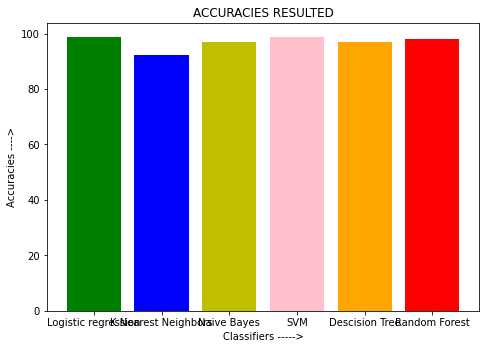

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['Logistic regression','K Nearest Neighbors','Naive Bayes','SVM','Descision Tree','Random Forest']

accuracy = [accuracy_logistic*100,accuracy_knn*100,accuracy_naive*100,accuracy_svm*100,accuracy_decision*100,accuracy_random*100]

ax.bar(algo[0],accuracy[0],color = 'g')

ax.bar(algo[1],accuracy[1],color = 'b')

ax.bar(algo[2],accuracy[2],color = 'y')

ax.bar(algo[3],accuracy[3],color = 'pink')

ax.bar(algo[4],accuracy[4],color = 'orange')

ax.bar(algo[5],accuracy[5],color = 'r')



plt.xlabel('Classifiers ----->')

plt.ylabel('Accuracies ---->')

plt.title('ACCURACIES RESULTED')

plt.show()